In [ ]:
"""    
    
 Blaesei
    
"""

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

dataset_path = './chest_xray'  # Change if your dataset folder is elsewhere

In [11]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'val'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [17]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [19]:
for layer in base_model.layers:
    layer.trainable = False

In [21]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8547 - loss: 0.3118 - val_accuracy: 0.8125 - val_loss: 0.3602
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 783ms/step - accuracy: 0.9463 - loss: 0.1381 - val_accuracy: 0.8750 - val_loss: 0.3306
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 802ms/step - accuracy: 0.9507 - loss: 0.1294 - val_accuracy: 0.8750 - val_loss: 0.2673
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 792ms/step - accuracy: 0.9565 - loss: 0.1115 - val_accuracy: 0.8125 - val_loss: 0.2754
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 790ms/step - accuracy: 0.9592 - loss: 0.1071 - val_accuracy: 0.8125 - val_loss: 0.2833


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 731ms/step - accuracy: 0.8156 - loss: 0.3912
Test Accuracy: 87.66%


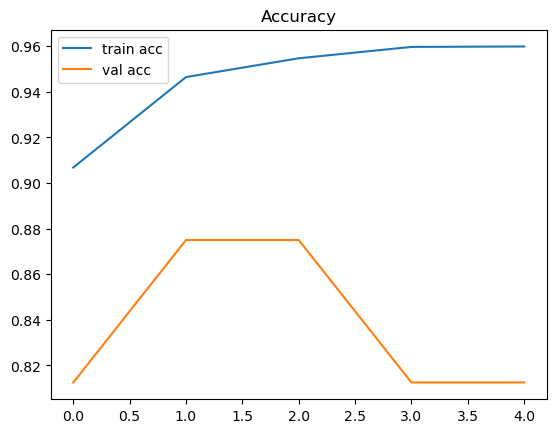

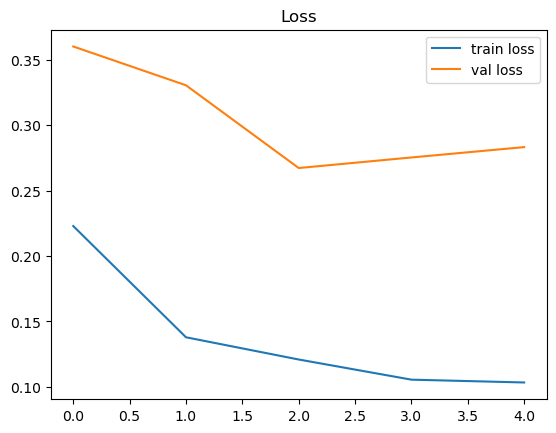

In [23]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()